In [25]:
from sklearn import metrics as sk_metrics
import networkx as nx

from src.metrics import *
from src.graphs import draw_graph, random_graph
from src.criterions import draw_criterion
from src.em import em_algorithm

In [2]:
%reload_ext autoreload
%autoreload 2

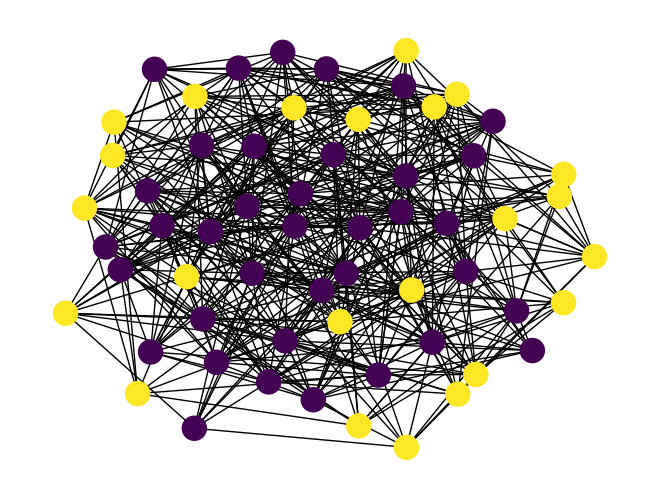

alpha:  [0.66991485 0.33008515]
pi:  [[0.34417602 0.33669205]
 [0.15582398 0.16330795]]


In [59]:
# Generate a random graph with SBM
Q = 2
n = 60
X, Z, alpha, pi = random_graph(n, Q)
draw_graph(X, Z)
print("alpha: ", alpha)
print("pi: ", pi)

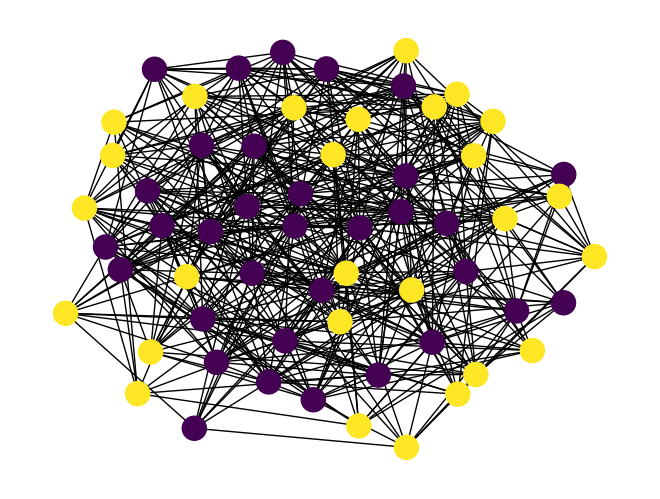

In [60]:
pred = Z.copy()
for i in range(Z.shape[0]):
    if np.random.rand() < 0.1:
        pred[i] = 1 - pred[i]
draw_graph(X, pred)

In [61]:
true_labels_labels = np.argmax(Z, axis=1)
predictions = np.argmax(pred, axis=1)

# Test supervised metrics

In [62]:
print("Rand index: ", rand_index(true_labels_labels, predictions))
print("MI: ", normalized_mutual_information(true_labels_labels, predictions))

Rand index:  0.7649717514124293
MI:  0.44549354723526474


# Test unsupervised metrics

In [63]:
original_cluster_2 = true_labels_labels.astype(bool)
original_cluster_1 = np.logical_not(original_cluster_2)
predicted_cluster_2 = predictions.astype(bool)
predicted_cluster_1 = np.logical_not(predicted_cluster_2)

print(f"Overall graph density: {intra_cluster_density(X, np.ones(X.shape[0], dtype=bool)):.2f}")
print(f"Intra-cluster density for original cluster 1: {intra_cluster_density(X, original_cluster_1):.2f}")
print(f"Intra-cluster density for original cluster 2: {intra_cluster_density(X, original_cluster_2):.2f}")
print(f"Original inter-cluster density: {inter_cluster_density(X, original_cluster_1):.2f}")
print(f"Intra-cluster density for predicted cluster 1: {intra_cluster_density(X, predicted_cluster_1):.2f}")
print(f"Intra-cluster density for predicted cluster 2: {intra_cluster_density(X, predicted_cluster_2):.2f}")
print(f"Predicted inter-cluster density: {inter_cluster_density(X, predicted_cluster_1):.2f}")

Overall graph density: 0.27
Intra-cluster density for original cluster 1: 0.35
Intra-cluster density for original cluster 2: 0.17
Original inter-cluster density: 0.25
Intra-cluster density for predicted cluster 1: 0.32
Intra-cluster density for predicted cluster 2: 0.18
Predicted inter-cluster density: 0.28


In [64]:
print("Conductance for original clusters:", conductance(X, original_cluster_1), conductance(X, original_cluster_2))
print("Conductance for predicted clusters:", conductance(X, predicted_cluster_1), conductance(X, predicted_cluster_2))

Conductance for original clusters: 0.0003672150411280846 0.0008280822403962176
Conductance for predicted clusters: 0.00047505218949850766 0.0007472306322881036


In [65]:
clustering = np.array([original_cluster_1, original_cluster_2])
modularity(X, clustering)

-0.007320650441067066

In [66]:
modularity(X, clustering)

-0.007320650441067066

Number of nodes: 34
Number of edges: 78
Modularity: 0.37146614069690986
Conductance of the clusters: 0.0004568713450292398 0.0004340277777777778


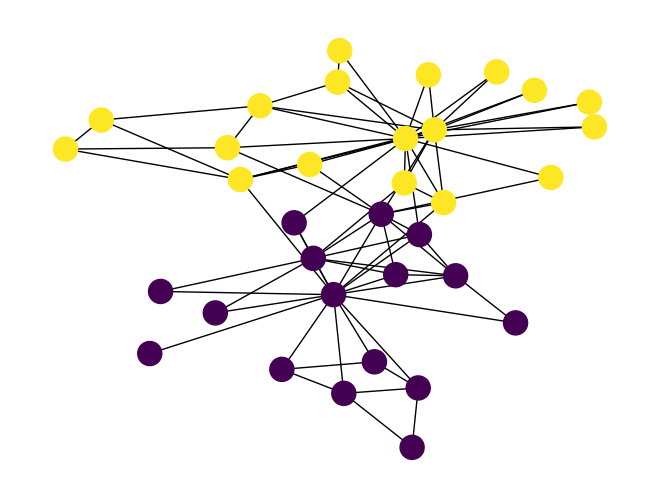

In [75]:
# Example on the karate network
# Loads the karate network
G = nx.read_weighted_edgelist('./data/karate.edgelist', delimiter=' ', nodetype=int, create_using=nx.Graph())
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

n = G.number_of_nodes()

# Loads the class labels
class_labels = np.loadtxt('./data/karate_labels.txt', delimiter=',', dtype=np.int32)
idx_to_class_label = dict()
for i in range(class_labels.shape[0]):
    idx_to_class_label[class_labels[i,0]] = class_labels[i,1]

y = list()
for node in G.nodes():
    y.append(idx_to_class_label[node])

y = np.array(y)
X = nx.to_numpy_array(G)
nx.draw(G, node_color=y)

clustering = np.array([y == 0, y == 1])
print("Modularity:", modularity(X, clustering))
print("Conductance of the clusters:", conductance(X, clustering[0]), conductance(X, clustering[1]))

# Test ICL criterion

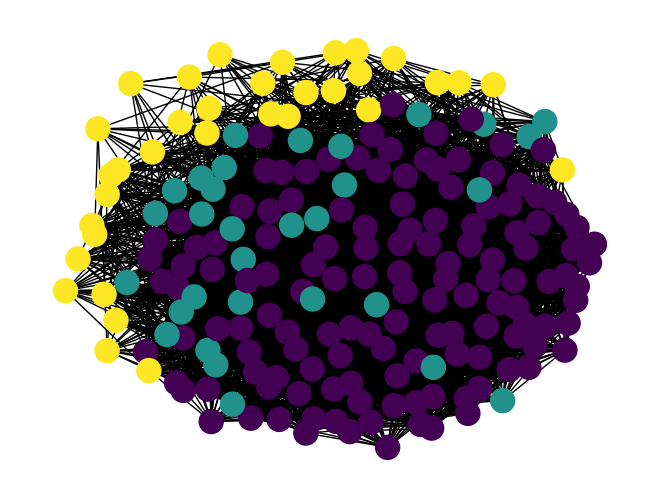

alpha:  [0.65407914 0.1506636  0.19525726]
pi:  [[0.24753121 0.18122554 0.14042362]
 [0.19958405 0.23257132 0.25208046]
 [0.05288475 0.08620313 0.10749592]]


In [61]:
# Generate a random graph with SBM
Q = 3
n = 200
X, Z, alpha, pi = random_graph(n, Q)
draw_graph(X, Z)
print("alpha: ", alpha)
print("pi: ", pi)

After EM iteration 100/100 : Mean log likelihood (1 paths) -9677.374137...


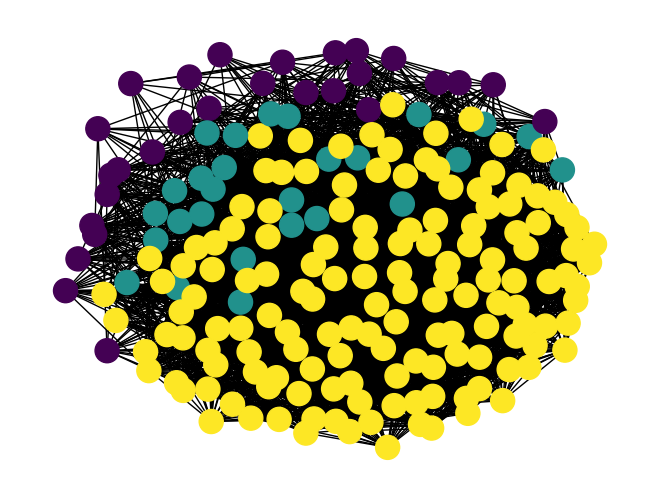

alpha:  [0.14466461 0.16423398 0.69110141]
pi:  [[0.11469135 0.19183764 0.08263742]
 [0.19183764 0.21429113 0.20225829]
 [0.08263742 0.20225829 0.24212851]]
NMI: 0.4779157641894927


In [62]:
alpha, pi, tau = em_algorithm(X, Q, n_init=1, iterations=100)
draw_graph(X, tau)
print("alpha: ", alpha)
print("pi: ", pi)
print("NMI:", normalized_mutual_information(np.argmax(Z, axis=1), np.argmax(tau, axis=1)))

Running EM algorithm for Q = 1...
After EM iteration 30/30 : Mean log likelihood (1 paths) -9826.300696...
ICL criterion for Q = 1 : -9831.249933966972

Running EM algorithm for Q = 2...
After EM iteration 30/30 : Mean log likelihood (1 paths) -9690.897865...
ICL criterion for Q = 2 : -9716.399463847012

Running EM algorithm for Q = 3...
After EM iteration 30/30 : Mean log likelihood (1 paths) -9680.509885...
ICL criterion for Q = 3 : -9800.088415733851

Running EM algorithm for Q = 4...
After EM iteration 30/30 : Mean log likelihood (1 paths) -9677.629855...
ICL criterion for Q = 4 : -9878.179768782782

Running EM algorithm for Q = 5...
After EM iteration 30/30 : Mean log likelihood (1 paths) -9677.142507...
ICL criterion for Q = 5 : -9955.523143730297



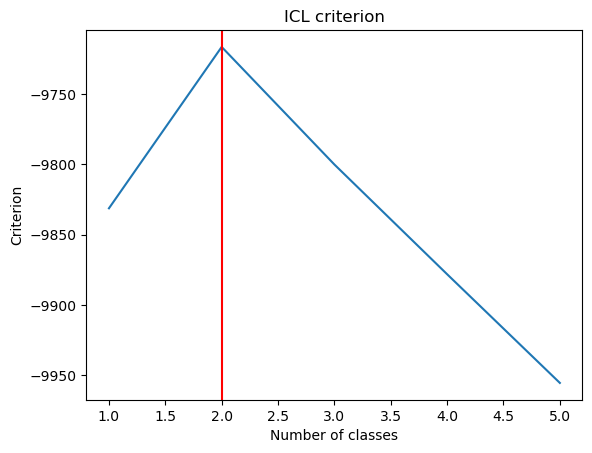

In [64]:
draw_criterion(X, min_Q=1, max_Q=5, em_n_init=5, em_iterations=30)